## Experiment 2: Binary Classification using Naïve Bayes and K-Nearest Neighbors

R Padmashri   
3122 23 5001 093   
CSE - B

#### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)

#### Dataset

In [2]:
data = pd.read_csv("spambase_csv_Kaggle.csv")
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
print("Shape of dataset:", data.shape)
data.info()

Shape of dataset: (4601, 58)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word

In [4]:
data.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [5]:
X = data.iloc[:, :-1]   # All features
y = data.iloc[:, -1]    # Target (spam / not spam)


#### Identifying Class Distribution 

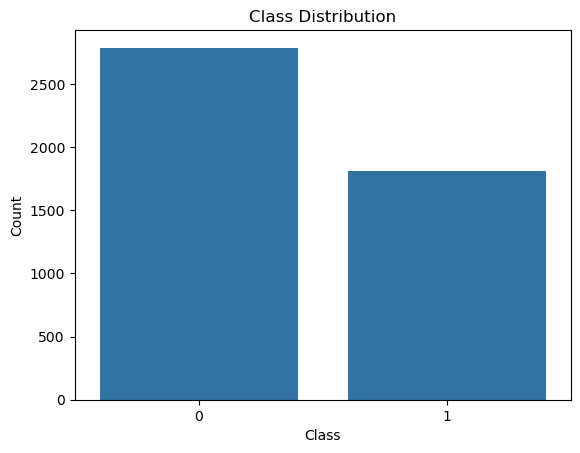

In [6]:
sns.countplot(x=y)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


#### Test Train Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### NAIVE BAYES

In [10]:
gnb = GaussianNB()
start = time.time()
gnb.fit(X_train, y_train)
train_time_gnb = time.time() - start

y_pred_gnb = gnb.predict(X_test)


In [11]:
mnb = MultinomialNB()
start = time.time()
mnb.fit(X_train, y_train)
train_time_mnb = time.time() - start

y_pred_mnb = mnb.predict(X_test)


In [12]:
bnb = BernoulliNB()
start = time.time()
bnb.fit(X_train, y_train)
train_time_bnb = time.time() - start

y_pred_bnb = bnb.predict(X_test)


In [13]:
def evaluate_model(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    
    return acc, prec, rec, f1, specificity


In [14]:
nb_results = pd.DataFrame({
    "Model": ["Gaussian NB", "Multinomial NB", "Bernoulli NB"],
    "Accuracy": [
        evaluate_model(y_test, y_pred_gnb)[0],
        evaluate_model(y_test, y_pred_mnb)[0],
        evaluate_model(y_test, y_pred_bnb)[0]
    ],
    "Precision": [
        evaluate_model(y_test, y_pred_gnb)[1],
        evaluate_model(y_test, y_pred_mnb)[1],
        evaluate_model(y_test, y_pred_bnb)[1]
    ],
    "Recall": [
        evaluate_model(y_test, y_pred_gnb)[2],
        evaluate_model(y_test, y_pred_mnb)[2],
        evaluate_model(y_test, y_pred_bnb)[2]
    ],
    "F1 Score": [
        evaluate_model(y_test, y_pred_gnb)[3],
        evaluate_model(y_test, y_pred_mnb)[3],
        evaluate_model(y_test, y_pred_bnb)[3]
    ],
    "Specificity": [
        evaluate_model(y_test, y_pred_gnb)[4],
        evaluate_model(y_test, y_pred_mnb)[4],
        evaluate_model(y_test, y_pred_bnb)[4]
    ],
    "Training Time (s)": [
        train_time_gnb, train_time_mnb, train_time_bnb
    ]
})

nb_results


,Model,Accuracy,Precision,Recall,F1 Score,Specificity,Training Time (s)
0,Gaussian NB,0.830582,0.713344,0.953744,0.816211,0.750359,0.006217
1,Multinomial NB,0.776716,0.724374,0.700441,0.712206,0.826399,0.008276
2,Bernoulli NB,0.881842,0.876777,0.814978,0.844749,0.925395,0.007699


### K-Nearest Neighbours

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

accuracy_score(y_test, y_pred_knn)


0.8992180712423979

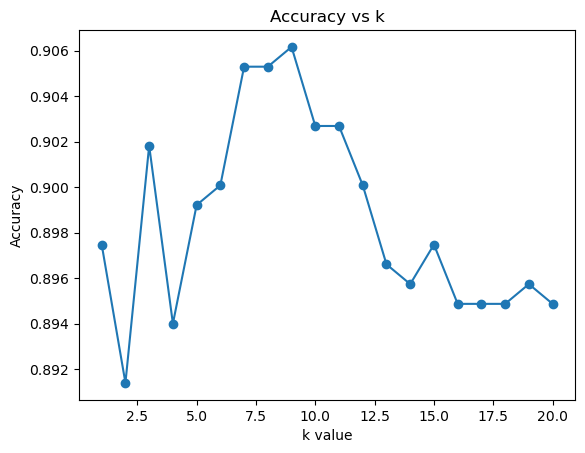

In [16]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(k_values, accuracies, marker='o')
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k")
plt.show()


In [17]:
param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train_scaled, y_train)
grid.best_params_, grid.best_score_


({'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'},
 np.float64(0.9246376811594204))

In [18]:
rand = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_grid,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42
)

rand.fit(X_train_scaled, y_train)
rand.best_params_, rand.best_score_


({'weights': 'distance', 'n_neighbors': 16, 'metric': 'euclidean'},
 np.float64(0.9179710144927536))

In [19]:
knn_kd = KNeighborsClassifier(
    n_neighbors=grid.best_params_['n_neighbors'],
    algorithm='kd_tree'
)

knn_bt = KNeighborsClassifier(
    n_neighbors=grid.best_params_['n_neighbors'],
    algorithm='ball_tree'
)

knn_kd.fit(X_train_scaled, y_train)
knn_bt.fit(X_train_scaled, y_train)

y_pred_kd = knn_kd.predict(X_test_scaled)
y_pred_bt = knn_bt.predict(X_test_scaled)


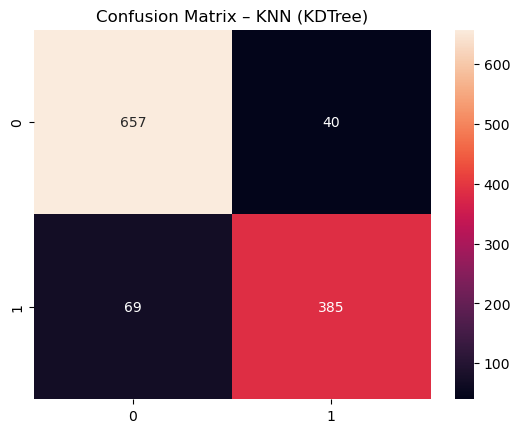

In [20]:
cm = confusion_matrix(y_test, y_pred_kd)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix – KNN (KDTree)")
plt.show()


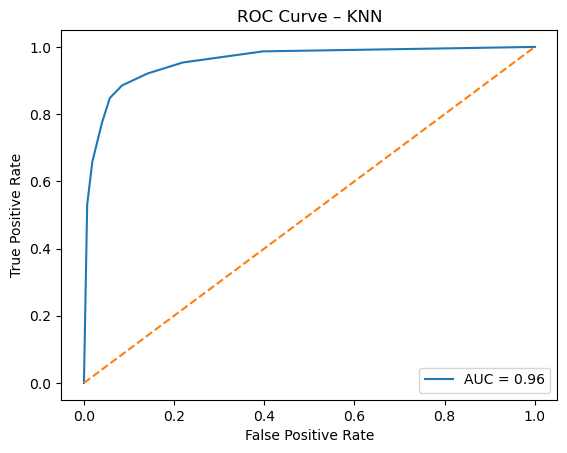

In [21]:
y_prob = knn_kd.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="AUC = %.2f" % roc_auc)
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – KNN")
plt.legend()
plt.show()


### Conclusions:

- Naive Bayes is fast but assumes feature independence.
- KNN performance improves with proper choice of K.
- GridSearch helps in selecting optimal K.